In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Problem Statement 1

## Exporting data

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/DataSets/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# checking the columns wir=th the null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
df.isnull().sum()[df.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
# Columns with more than 40% of NULL values are removed
miss_col=df.isnull().sum()/df.shape[0]
miss_col=miss_col[miss_col>0.4]
miss_col # Columns with more than 40% of NULL values

Alley          0.937671
FireplaceQu    0.472603
PoolQC         0.995205
Fence          0.807534
MiscFeature    0.963014
dtype: float64

## Removing the columns

In [ ]:
# id is not used in prediction
df=df.drop(columns=['Id'])

In [ ]:
df=df.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
num_col=df.select_dtypes(include=['int64','float64']).columns
len(num_col)

37

In [ ]:
obj_col=df.select_dtypes(include=['object']).columns
len(obj_col)

38

## Fillinng the missing values

In [ ]:
# Filling the missing numerical Values with mean strategy 
from sklearn.impute import SimpleImputer
impute_num=SimpleImputer(missing_values=np.nan,strategy='mean')
df[num_col]=impute_num.fit_transform(df[num_col])

In [ ]:
# Filling the missing categorical Values with median strategy 
from sklearn.impute import SimpleImputer
impute_obj=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[obj_col]=impute_obj.fit_transform(df[obj_col])

In [ ]:
df.isnull().sum().sum()

0

## Label Encoding


In [ ]:
#Encoding Categorical Data for each object type column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in obj_col:
    df[i]=le.fit_transform(df[i])
print(df.select_dtypes(include=['object']).columns)
df

Index([], dtype='object')


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3,65.0,8450.0,1,3,3,0,4,0,5,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,1,2003.0,1,2.0,548.0,4,4,2,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,20.0,3,80.0,9600.0,1,3,3,0,2,0,24,1,2,0,2,6.0,8.0,1976.0,1976.0,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,1,1976.0,1,2.0,460.0,4,4,2,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,60.0,3,68.0,11250.0,1,0,3,0,4,0,5,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,1,2001.0,1,2.0,608.0,4,4,2,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,70.0,3,60.0,9550.0,1,0,3,0,0,0,6,2,2,0,5,7.0,5.0,1915.0,1970.0,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,5,1998.0,2,3.0,642.0,4,4,2,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,60.0,3,84.0,14260.0,1,0,3,0,2,0,15,2,2,0,5,8.0,5.0,2000.0,2000.0,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,1,2000.0,1,3.0,836.0,4,4,2,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3,62.0,7917.0,1,3,3,0,4,0,8,2,2,0,5,6.0,5.0,1999.0,2000.0,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0.0,5,0.0,953.0,953.0,1,0,1,4,953.0,694.0,0.0,1647.0,0.0,0.0,2.0,1.0,3.0,1.0,3,7.0,6,1.0,1,1999.0,1,2.0,460.0,4,4,2,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,8,4,175000.0
1456,20.0,3,85.0,13175.0,1,3,3,0,4,0,14,2,2,0,2,6.0,6.0,1978.0,1988.0,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790.0,4,163.0,589.0,1542.0,1,4,1,4,2073.0,0.0,0.0,2073.0,1.0,0.0,2.0,0.0,3.0,1.0,3,7.0,2,2.0,1,1978.0,2,2.0,500.0,4,4,2,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,8,4,210000.0
1457,70.0,3,66.0,9042.0,1,3,3,0,4,0,6,2,2,0,5,7.0,9.0,1941.0,2006.0,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275.0,5,0.0,877.0,1152.0,1,0,1,4,1188.0,1152.0,0.0,2340.0,0.0,0.0,2.0,0.0,4.0,1.0,2,9.0,6,2.0,1,1941.0,1,1.0,252.0,4,4,2,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,8,4,266500.0
1458,20.0,3,68.0,9717.0,1,3,3,0,4,0,12,2,2,0,2,5.0,6.0,1950.0,1996.0,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49.0,4,1029.0,0.0,1078.0,1,2,1,0,1078.0,0.0,0.0,1078.0,1.0,0.0,1.0,0.0,2.0,1.0,2,5.0,6,0.0,1,1950.0,2,1.0,240.0,4,4,2,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,8,4,142125.0


## Seperating the dependent and Independent Variables

In [ ]:
# 'x' is dependent Variable and 'y' is independent variable
y=df.iloc[:,-1].values
x=df.iloc[:,0:-1].values

In [ ]:
x

array([[  60.,    3.,   65., ..., 2008.,    8.,    4.],
       [  20.,    3.,   80., ..., 2007.,    8.,    4.],
       [  60.,    3.,   68., ..., 2008.,    8.,    4.],
       ...,
       [  70.,    3.,   66., ..., 2010.,    8.,    4.],
       [  20.,    3.,   68., ..., 2010.,    8.,    4.],
       [  20.,    3.,   75., ..., 2008.,    8.,    4.]])

In [ ]:
y=y.reshape(len(y),1)
y

array([[208500.],
       [181500.],
       [223500.],
       ...,
       [266500.],
       [142125.],
       [147500.]])

##Spliting of data to train and test data 

In [ ]:
# split the data to train and test 
# x_train and y_train are used for training
# y_train and y_test are ysed for testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 74)
(365, 74)
(1095, 1)
(365, 1)


## Standardisation

In [ ]:
#Standardisation of data
from sklearn.preprocessing import StandardScaler
x_sc=StandardScaler()
y_sc=StandardScaler()
x_train_sc=x_sc.fit_transform(x_train)  # x_train_sc and x_test_sc are Standardised Data
x_test_sc=x_sc.transform(x_test)
y_train_sc=y_sc.fit_transform(y_train)
y_test_sc=y_sc.transform(y_test)

#Model Training

## Linear Regression

In [ ]:
# Using the Linear Regression on non Standardised data
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.6288556774237123

In [ ]:
# Using the Linear Regression on Standardised data
from sklearn.linear_model import LinearRegression
lr_sc=LinearRegression()
lr_sc.fit(x_train_sc,y_train_sc)
lr_sc.score(x_test_sc,y_test_sc)

0.6287897087361793

## Decision Tree

In [ ]:
# Using the Desion Tree Regression on non Standardised data
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=10)
tree_reg.fit(x_train,y_train)
tree_reg.score(x_test,y_test)

0.7760443421430727

In [ ]:
# Using the Desion Tree Regression on Standardised data
from sklearn.tree import DecisionTreeRegressor
tree_reg_sc=DecisionTreeRegressor(random_state=10)
tree_reg_sc.fit(x_train_sc,y_train_sc)
tree_reg_sc.score(x_test_sc,y_test_sc)

0.704653362896428

In [ ]:
# Applying the Cross Validation on the Decision tree regression model for finding the general 
# the Genreal accuracy of the model to check if it is over fitte or under fitted
from sklearn.model_selection import cross_val_score
accuracies_tree= cross_val_score(estimator = tree_reg_sc, X = x_train_sc, y = y_train_sc, cv = 10)
print('Accuracy={:f} and Standard Deviation={:f}'.format(accuracies_tree.mean()*100,accuracies_tree.std()*100))
accuracies_tree

Accuracy=69.052034 and Standard Deviation=15.091996


array([0.71911516, 0.67419092, 0.25039345, 0.80313864, 0.7770217 ,
       0.69908734, 0.74976773, 0.75679151, 0.72459011, 0.75110684])

## Random Forest Regression

In [ ]:
#Checking random Forest for different values of n_estimators
from sklearn.ensemble import RandomForestRegressor
for i in range(10,30):
    forest_reg=RandomForestRegressor(n_estimators=i,random_state=10)
    forest_reg.fit(x_train,y_train)
    print(forest_reg.score(x_test,y_test))

0.8157112687700085


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8222116907858448


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8266022893683148
0.8331131221082351


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8384146602280252


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8358248274315375


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.838640498003458


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8390338418321076


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.84653896601051


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8455508514156397


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8481945907098831


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8524847083481294


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8517454365052202


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8522849019622005


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8504821214379855


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8502885796192904


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8495239351279062


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8494968875645627


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.848528532962774


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.8499594612106625


In [ ]:
from sklearn.model_selection import GridSearchCV
forest_reg_sc=RandomForestRegressor(random_state=10)
para={'n_estimators':[1,5,10,20,30,35,40,45,50,55,100]}
# para consists of different values of nP_estimators to find which value is best for our random forest regression model  
print(para)
grid_rig=GridSearchCV(estimator=forest_reg_sc,
                     param_grid=para,scoring='neg_mean_squared_error',
                     cv=10,n_jobs=-1)
grid_rig=grid_rig.fit(x_train_sc,y_train_sc)
print('Best Score= ',grid_rig.best_score_) # gives the MSE for corresponding best n_estimators
print('Best parameter= ',grid_rig.best_params_) # Gives the _estimators having the least value of the MSE

{'n_estimators': [1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score=  -0.14203301907047977
Best parameter=  {'n_estimators': 100}


In [ ]:
forest_reg_sc=RandomForestRegressor(n_estimators=45,random_state=10)
forest_reg_sc.fit(x_train_sc,y_train_sc)
print(forest_reg_sc.score(x_test_sc,y_test_sc))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8534839657909796


In [ ]:
# Cross validation of the Random Forest Regression model to check for the General Accuracy of the Model 
from sklearn.model_selection import cross_val_score
accuracies_forest= cross_val_score(estimator = forest_reg_sc, X = x_train_sc, y = y_train_sc, cv = 10)
print('Accuracy={:f} and Standard Deviation={:f}'.format(accuracies_forest.mean()*100,accuracies_forest.std()*100))
accuracies_forest

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Accuracy=85.152438 and Standard Deviation=7.784633


array([0.85585985, 0.89151782, 0.62232546, 0.8875495 , 0.88016321,
       0.88148513, 0.84267813, 0.8891632 , 0.87718631, 0.88731522])

# Prediction

In [ ]:
forest_reg_sc.predict(x_test_sc)    

array([ 4.17303313e-01, -3.98089288e-01, -1.00583149e+00,  4.63827715e-01,
       -1.12401774e+00, -9.34524441e-01,  1.07014141e+00, -7.92715943e-01,
        3.74223840e+00, -3.23430258e-01,  1.09951483e-01, -4.59336734e-01,
        5.76841737e-01, -7.39045804e-01, -7.65650677e-01, -3.75579555e-01,
        6.03269775e-01, -8.44944661e-01, -3.73671874e-01,  1.75578642e-01,
       -6.56813585e-01, -4.82135552e-01, -8.24259409e-01, -1.61219276e-01,
       -2.96253887e-02,  3.49318911e-01, -1.64548410e-01, -1.20887881e+00,
        2.00240232e+00, -8.03324556e-01, -6.20025858e-01,  2.24012417e-01,
       -4.94643780e-01,  1.32203456e+00,  1.83417131e+00,  7.23173713e-02,
        1.29273484e+00, -7.16054920e-01,  7.44035704e-01,  1.54852288e+00,
        2.59981680e-01, -6.69730763e-01, -1.18607441e-02,  1.42085576e+00,
        1.70162669e+00, -4.33978171e-01, -5.93736582e-01, -6.60113388e-01,
       -1.18299838e-01, -9.23053536e-01,  2.56907918e+00, -4.36699803e-01,
       -1.34173865e-01, -

#Problem Statement 2

In [ ]:
from sklearn.linear_model import Ridge,Lasso

## Ridge Regression

In [ ]:
#Hyperparameter tuning of Ridge Regression
from sklearn.model_selection import GridSearchCV
rd=Ridge(random_state=0)
para={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
print(para)
grid_rig=GridSearchCV(estimator=rd,
                     param_grid=para,scoring='neg_mean_squared_error',
                     cv=7,n_jobs=-1)
grid_rig=grid_rig.fit(x_train_sc,y_train_sc)
print('Best score= ',grid_rig.best_score_)
print('Best parameter= ',grid_rig.best_params_)

{'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
Best score=  -0.147313430387144
Best parameter=  {'alpha': 100}


In [ ]:
#Model training
rd=Ridge(alpha=100,random_state=0)
rd.fit(x_train_sc,y_train)
print(rd.score(x_test_sc,y_test))
rd.coef_

0.6689229839919186


array([[-3048.00706915,  -633.61982414,   758.87555606,  5098.66500945,
         2333.36919994,  -811.40646444,  1444.97867656, -1013.87772001,
          261.33654598,   170.94018532,   602.15336011, -1624.8558183 ,
        -5819.31798168, -1372.86841195, -1545.68720009, 11976.71828491,
         5155.19562748,  3998.07134353,  1816.92173716,  2044.11515645,
         2418.55831077, -2377.20339486,  1354.13063804,  3494.67410842,
         6595.70099945, -6211.81024196,   492.46664609,  1735.5522855 ,
        -7409.12403275,  1401.67783542, -2744.84880767,    52.12478705,
         6492.91278612,  1009.1544451 ,  1950.96337967, -1259.16303858,
         6282.33787243,  -349.54039811, -1449.96460026,   202.43885417,
         -716.44080032,  7823.26401736,  7700.72808695,  -415.11152155,
        12213.87938843,  1386.46532505,   310.23694634,  2656.57486218,
         2326.84217667, -2424.29467972, -3670.29409953, -5977.70973825,
         5847.61332841,  3757.6385649 ,  3664.32365719,   512.63

In [ ]:
# Model training for Double alpha value
rd=Ridge(alpha=200,random_state=0)
rd.fit(x_train_sc,y_train)
print(rd.score(x_test_sc,y_test))
rd.coef_

0.6905778045575908


array([[-2525.48744165,  -553.38226371,   983.9553837 ,  4689.17040184,
         2198.19393702,  -956.596697  ,  1184.4469458 ,  -955.92278592,
          115.4548865 ,   292.88245943,   679.5876436 , -1407.26445007,
        -4980.93914879, -1606.0452403 , -1251.41128565, 11226.01702561,
         4550.4999441 ,  2987.96487471,  2213.76351408,  2148.62070563,
         2456.01804127, -1817.4513545 ,   906.54575219,  3195.62195229,
         6388.75228024, -6183.80899955,   452.90496455,  1805.32001026,
        -7118.50894356,  1263.29163155, -2613.17672391,  -183.44971117,
         6143.73699888,   842.45191171,  1647.19464407,  -850.90207134,
         6229.08818156,  -219.15837516, -1660.8202558 ,   483.84106276,
         -578.26049837,  7236.33398042,  6748.26807478,  -302.87510846,
        10986.41028769,  1625.1416286 ,   311.63794178,  3137.5253377 ,
         2507.4737319 , -1694.57238218, -3439.62558985, -5996.73579239,
         5748.63570592,  3470.40537149,  3963.39824653,   298.19

In [ ]:
col=df.columns
print(col.shape)
col=col[0:len(col)-1]
print(col.shape)
print(col)

(75,)
(74,)
Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', '

In [ ]:
print(rd.coef_.shape)
rd_coef=rd.coef_.reshape(rd.coef_.shape[1])
print(max(rd_coef))
rd_coef

(1, 74)
11226.017025608819


array([-2525.48744165,  -553.38226371,   983.9553837 ,  4689.17040184,
        2198.19393702,  -956.596697  ,  1184.4469458 ,  -955.92278592,
         115.4548865 ,   292.88245943,   679.5876436 , -1407.26445007,
       -4980.93914879, -1606.0452403 , -1251.41128565, 11226.01702561,
        4550.4999441 ,  2987.96487471,  2213.76351408,  2148.62070563,
        2456.01804127, -1817.4513545 ,   906.54575219,  3195.62195229,
        6388.75228024, -6183.80899955,   452.90496455,  1805.32001026,
       -7118.50894356,  1263.29163155, -2613.17672391,  -183.44971117,
        6143.73699888,   842.45191171,  1647.19464407,  -850.90207134,
        6229.08818156,  -219.15837516, -1660.8202558 ,   483.84106276,
        -578.26049837,  7236.33398042,  6748.26807478,  -302.87510846,
       10986.41028769,  1625.1416286 ,   311.63794178,  3137.5253377 ,
        2507.4737319 , -1694.57238218, -3439.62558985, -5996.73579239,
        5748.63570592,  3470.40537149,  3963.39824653,   298.19568935,
      

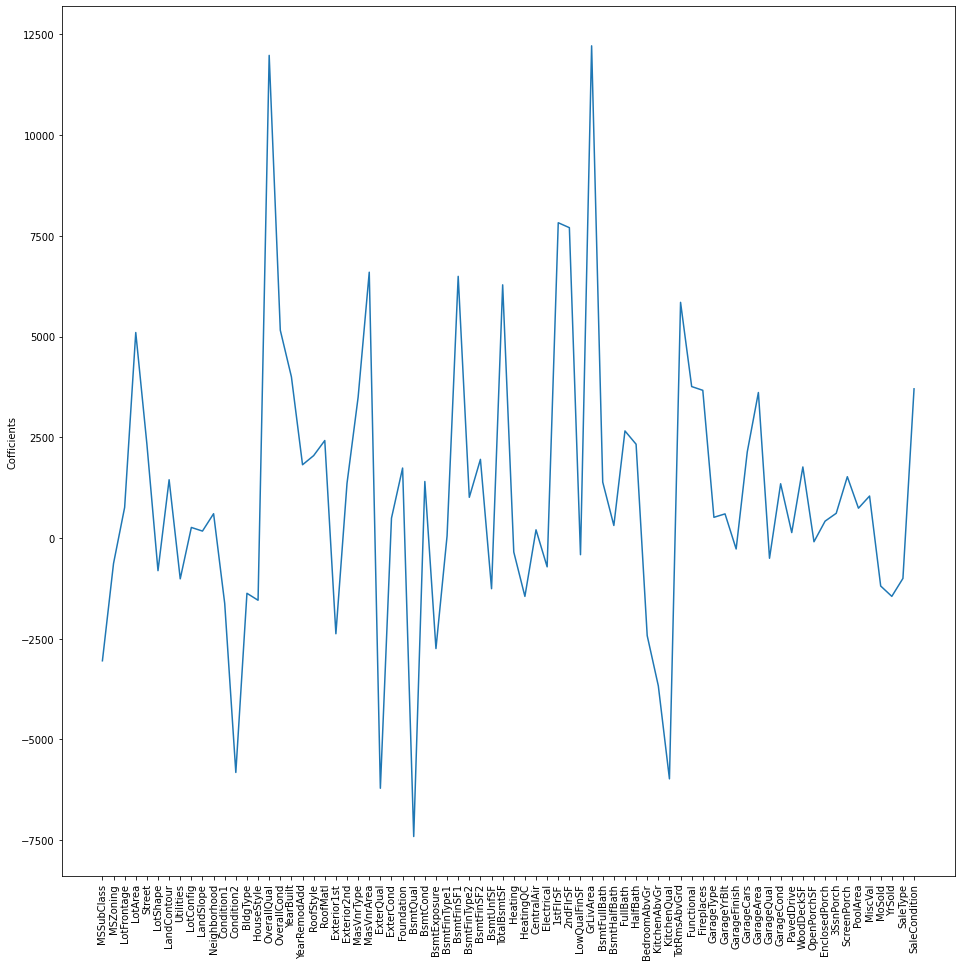

In [ ]:
#ploting the graph betwen the Cofficients and the Columns 
plt.figure(figsize=(16,16))
plt.plot(range(len(col)),rd_coef)
plt.xticks(range(len(col)),col,rotation=90)
plt.ylabel('Cofficients')
plt.show()

In [ ]:
# Finding Most important Variable/Column  
rd_coef[3]
m=max(rd_coef)
print(m)
for i in range(len(col)):
    if rd_coef[i]==m:   
        imp_pred=col[i]
print(imp_pred)

11226.017025608819
OverallQual


## Lasso Regression

In [ ]:
#Hyperparameter tuning of Lasso Regression
from sklearn.model_selection import GridSearchCV
ls=Lasso(random_state=0)
para={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
print(para)
grid_rig=GridSearchCV(estimator=ls,
                     param_grid=para,scoring='neg_mean_squared_error',
                     cv=10,n_jobs=-1)
grid_rig=grid_rig.fit(x_train_sc,y_train_sc)
print('Best Score= ',grid_rig.best_score_)
print('Best parameter= ',grid_rig.best_params_)

{'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
Best Score=  -0.15083391209308183
Best parameter=  {'alpha': 0.01}


In [ ]:
# Model training
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train_sc,y_train)
print(ls.score(x_test_sc,y_test))
ls.coef_

0.628856519803142


array([-4.14969279e+03, -6.82184558e+02,  4.37084965e+02,  5.67946682e+03,
        2.45364283e+03, -5.35142402e+02,  1.80759627e+03, -1.06379165e+03,
        4.94929241e+02,  1.12822846e+01,  5.92438585e+02, -1.90137459e+03,
       -7.13392577e+03, -7.05402256e+02, -1.90111075e+03,  1.26853161e+04,
        6.26820335e+03,  7.52303891e+03,  8.76746106e+02,  1.86249315e+03,
        2.24730411e+03, -3.46012889e+03,  2.46571461e+03,  3.87454255e+03,
        6.70397208e+03, -6.04906866e+03,  4.43655011e+02,  1.23690399e+03,
       -7.69840296e+03,  1.51413484e+03, -2.91573497e+03,  4.43337996e+02,
        1.14721368e+04,  1.35179548e+03,  4.09338075e+03,  2.64941480e+03,
        1.85616894e+03, -5.83377757e+02, -1.14430898e+03, -4.28243024e+02,
       -8.00632291e+02,  1.75479430e+04,  1.96340274e+04,  6.75624363e+02,
        3.09104388e+03,  8.53773543e+02,  2.80554549e+02,  1.22934577e+03,
        1.53231988e+03, -3.62911694e+03, -3.88719185e+03, -5.92079759e+03,
        5.79812094e+03,  

In [ ]:
# Model training for Double alpha value
ls=Lasso(alpha=0.02,random_state=0)
ls.fit(x_train_sc,y_train)
print(ls.score(x_test_sc,y_test))
ls.coef_

0.6288573859278459


array([-4.14970871e+03, -6.82180777e+02,  4.37072981e+02,  5.67946454e+03,
        2.45363124e+03, -5.35134684e+02,  1.80757326e+03, -1.06377823e+03,
        4.94909740e+02,  1.12719321e+01,  5.92425202e+02, -1.90136901e+03,
       -7.13389588e+03, -7.05387436e+02, -1.90107573e+03,  1.26853489e+04,
        6.26816951e+03,  7.52296535e+03,  8.76753382e+02,  1.86248370e+03,
        2.24729600e+03, -3.46003956e+03,  2.46564220e+03,  3.87453593e+03,
        6.70395586e+03, -6.04907786e+03,  4.43640249e+02,  1.23689627e+03,
       -7.69840985e+03,  1.51412799e+03, -2.91572439e+03,  4.43310645e+02,
        1.14708947e+04,  1.35176202e+03,  4.09289371e+03,  2.64816145e+03,
        1.85733233e+03, -5.83349484e+02, -1.14430575e+03, -4.28201009e+02,
       -8.00614434e+02,  1.75473913e+04,  1.96333493e+04,  6.75540331e+02,
        3.09183530e+03,  8.53741492e+02,  2.80527401e+02,  1.22932177e+03,
        1.53230607e+03, -3.62907559e+03, -3.88716267e+03, -5.92080569e+03,
        5.79806867e+03,  

In [ ]:
print(ls.coef_.shape)
ls_coef=ls.coef_.reshape(ls.coef_.shape[0])
print(max(ls_coef))
ls_coef

(74,)
19633.34932598228


array([-4.14970871e+03, -6.82180777e+02,  4.37072981e+02,  5.67946454e+03,
        2.45363124e+03, -5.35134684e+02,  1.80757326e+03, -1.06377823e+03,
        4.94909740e+02,  1.12719321e+01,  5.92425202e+02, -1.90136901e+03,
       -7.13389588e+03, -7.05387436e+02, -1.90107573e+03,  1.26853489e+04,
        6.26816951e+03,  7.52296535e+03,  8.76753382e+02,  1.86248370e+03,
        2.24729600e+03, -3.46003956e+03,  2.46564220e+03,  3.87453593e+03,
        6.70395586e+03, -6.04907786e+03,  4.43640249e+02,  1.23689627e+03,
       -7.69840985e+03,  1.51412799e+03, -2.91572439e+03,  4.43310645e+02,
        1.14708947e+04,  1.35176202e+03,  4.09289371e+03,  2.64816145e+03,
        1.85733233e+03, -5.83349484e+02, -1.14430575e+03, -4.28201009e+02,
       -8.00614434e+02,  1.75473913e+04,  1.96333493e+04,  6.75540331e+02,
        3.09183530e+03,  8.53741492e+02,  2.80527401e+02,  1.22932177e+03,
        1.53230607e+03, -3.62907559e+03, -3.88716267e+03, -5.92080569e+03,
        5.79806867e+03,  

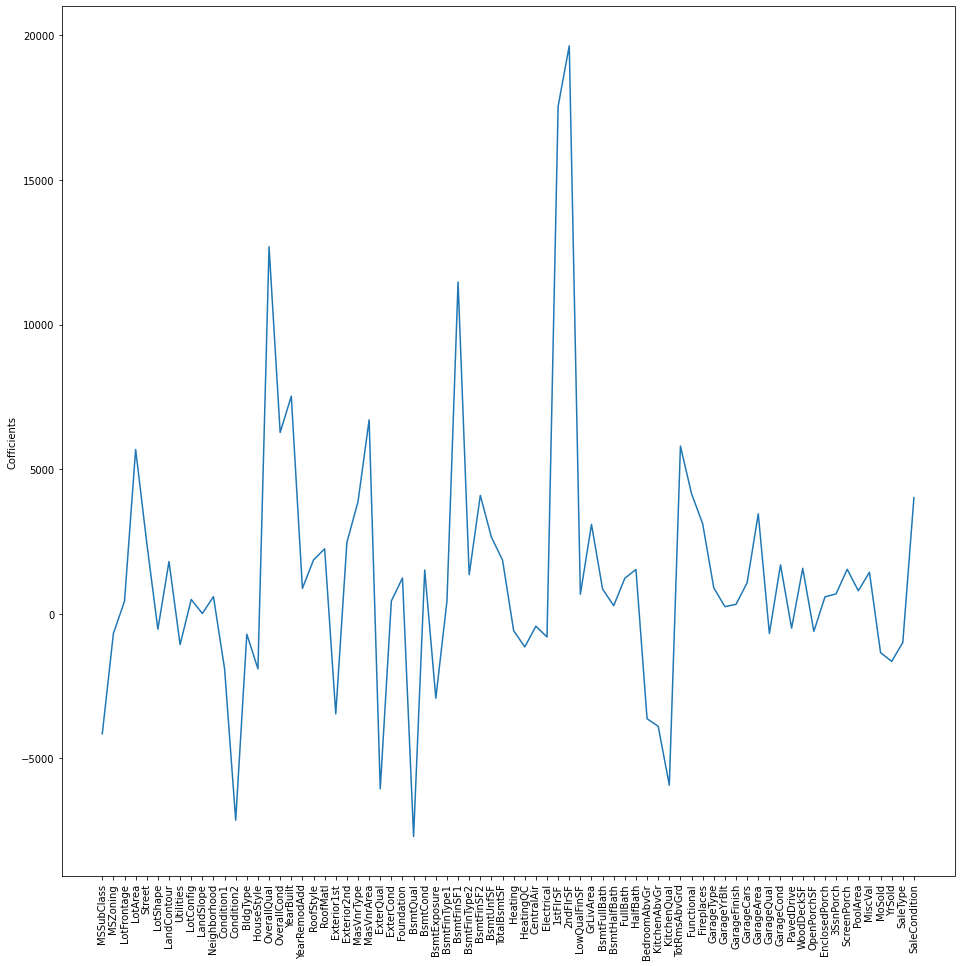

In [ ]:
#ploting the graph betwen the Cofficients and the Columns 
plt.figure(figsize=(16,16))
plt.plot(range(len(col)),ls_coef)
plt.xticks(range(len(col)),col,rotation=90)
plt.ylabel('Cofficients')
plt.show()

In [ ]:
# Finding Most important Variable/Column 
m=max(ls_coef)
print(m)
for i in range(len(col)):
    if ls_coef[i]==m:
        imp_pred=col[i]
print(imp_pred)

19633.34932598228
2ndFlrSF


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_ridge= cross_val_score(estimator = rd, X = x_train_sc, y = y_train_sc, cv = 10)
print('Accuracy={:f} and Standard Deviation={:f}'.format(accuracies_ridge.mean()*100,accuracies_ridge.std()*100))
accuracies_ridge

Accuracy=84.582197 and Standard Deviation=8.776072


array([0.86830144, 0.87185901, 0.59075023, 0.8688077 , 0.91949336,
       0.87578847, 0.85688663, 0.83544484, 0.90204007, 0.86884796])

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_lasso= cross_val_score(estimator = ls, X = x_train_sc, y = y_train_sc, cv = 10)
print('Accuracy={:f} and Standard Deviation={:f}'.format(accuracies_lasso.mean()*100,accuracies_lasso.std()*100))
accuracies_lasso

Accuracy=84.209085 and Standard Deviation=9.577517


array([0.86677455, 0.87081993, 0.5603117 , 0.86211344, 0.91608695,
       0.88066694, 0.85828795, 0.84273466, 0.89028769, 0.87282465])